In [17]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from scipy.integrate import simpson

def power_law(x,alpha,beta):
    return alpha*x**beta

EW=[]

In [332]:
fpath = '/media/bartosz/USB STICK/highz_data/fits/'
flist = glob.glob(fpath+'*.txt')

cpath = '/media/bartosz/USB STICK/highz_data/power_law_fits_spline_rsq_cl_bound.txt'

id = 20

spec = np.loadtxt(flist[id])
wl,fit = spec[:,0],spec[:,1]

pl_fits = np.loadtxt(cpath,dtype='str')
alpha = float(pl_fits[id][1])
beta = float(pl_fits[id][3])
cont = power_law(wl,alpha,beta)

print(flist[id][41:-10])
print(pl_fits[id][0])

VDESJ0330-4025_
VDESJ0330-4025


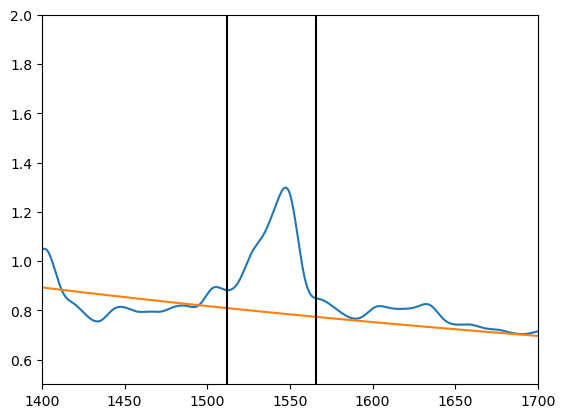

In [352]:
left = 1500+12
right = 1600-34

plt.plot(wl,fit,lw=1.5)
plt.plot(wl,cont)
plt.axvline(left,color='black')
plt.axvline(right,color='black')
plt.xlim(1400,1700)
plt.ylim(0.5,2)
# plt.savefig('plots/equivalent_widths/ew_{}.pdf'.format(pl_fits[id][0]),bbox_inches='tight')
plt.show()

In [351]:
mask = np.logical_and(wl>left,wl<right)
print(pl_fits[id][0])
ew=abs(simpson((1-fit[mask]/cont[mask]),x=wl[mask]))
ew

VDESJ0330-4025


18.247843220853763

In [355]:
mask = np.logical_and(wl>right,wl<right+5)

ew_err=abs(simpson((1-fit[mask]/cont[mask]),x=wl[mask]))
2*ew_err/ew

0.041105780048290956

In [3]:
hdpath = '/media/bartosz/USB STICK/highz_data/'
hfpath = hdpath + 'fits/'#sigma_clipped/'
hnpath = hdpath + 'normed/'#sigma_clipped/'

lpath = '/media/bartosz/USB STICK/BOSS_DR14_ext/'

# power law parameters
hpl = np.loadtxt(hdpath + 'power_law_fits_spline_rsq_cl_bound.txt', dtype='str')
plname = hpl[:,0]
halphas = [float(a) for a in hpl[:,1]]
hbetas = [float(b) for b in hpl[:,3]]

lpl = np.loadtxt(lpath + 'power_law_fits_spline_rsq_cl_bound.txt', dtype='str')
plidx = [int(i) for i in lpl[:,0]]
lalphas = [float(a) for a in lpl[:,2]]
lbetas = [float(b) for b in lpl[:,4]]


def find_dir(idx):
    sf2 = glob.glob(lpath + 'spectra_2_3/' + '{}_*.txt'.format(idx))
    sf3 = glob.glob(lpath + 'spectra_3_4/' + '{}_*.txt'.format(idx))
    sf1 = glob.glob(lpath + 'spectra_07_2/' + '{}_*.txt'.format(idx))
    if len(sf2) > 0: 
        specf = 'spectra_2_3/'
    elif len(sf3) > 0:
        specf = 'spectra_3_4/'
    elif len(sf1) > 0:
        specf = 'spectra_07_2/'
    else: print('eBOSS spec path could not be found')
    return specf

def plot_fit(idx,fig,ax,c,lw):

    filename = glob.glob(lpath + find_dir(idx) + 'fits/{}_*_0_dpx25.txt'.format(idx))[0]
    fit = np.loadtxt(filename)

    fit_wl = fit[:,0]
    fit_flux = fit[:,1]

    mask1 = fit_wl > 1250
    mask2 = fit_wl < 2250
    mask = np.logical_and(mask1,mask2)

    alpha = lalphas[plidx.index(idx)]
    beta = lbetas[plidx.index(idx)]
    
    ax.plot(fit_wl,fit_flux - power_law(fit_wl,alpha,beta) ,linewidth=lw, drawstyle='steps-mid', color=c, alpha=0.6,label='idx {}'.format(idx))
    return [min(fit_flux[mask] - power_law(fit_wl[mask],alpha,beta)), max(fit_flux[mask] - power_law(fit_wl[mask],alpha,beta))]


def plot_norm(idx,fig,ax,c,lw):
    filename = glob.glob(lpath + find_dir(idx) + 'normed/{}_*_norm.txt'.format(idx))[0]
    norm = np.loadtxt(filename)
    
    norm_wl = norm[:,0]
    norm_flux = norm[:,1]

    alpha = lalphas[plidx.index(idx)]
    beta = lbetas[plidx.index(idx)]
    
    ax.plot(norm_wl,norm_flux - power_law(norm_wl,alpha,beta) ,linewidth=lw, drawstyle='steps-mid', color=c, alpha=0.6) #, label='norm. data')
    return

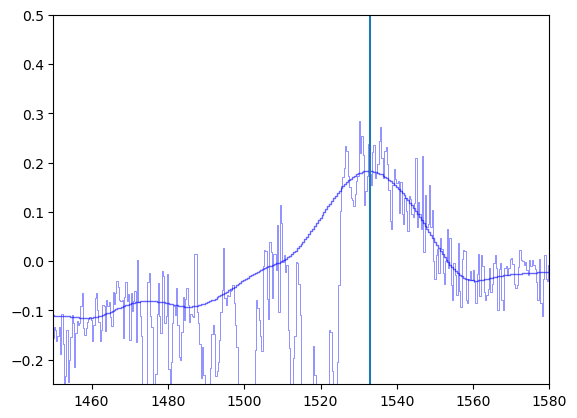

1533


In [66]:
idx = 174508
civ = 1550-17

fig, ax = plt.subplots()
c = 'blue'
plot_norm(idx,fig,ax,c,0.5)
plot_fit(idx,fig,ax,c,1)

ax.axvline(civ)
ax.set_xlim(1450,1580)
ax.set_ylim(-0.25,0.5)
plt.show()
plt.close()
print(civ)

In [67]:
sof = 299792.458
civ = np.array([1538,1538,1533,1543,1539.5])

v_shift = (civ-1549)*sof/1549
v_shift

# v_shift_err = 0.5*sof/1549
# v_shift_err

array([-2128.93288444, -2128.93288444, -3096.6296501 , -1161.23611879,
       -1838.62385474])